# Plot the parameter distribution for the TNG ETG catalog

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py 
import pandas as pd
import corner
import os

from cycler import cycler
import matplotlib as mpl
clist = ['#04B2D9', '#F2B33D', '#F29966', '#F2441D', '#0486C5']
mpl.rcParams['axes.prop_cycle'] = cycler(color=clist)

## The TNG100 data table

In [2]:
with h5py.File('../tng_data/Kinematics_TNG100.hdf5', 'r') as f:
    print(f.keys())
    sigma_rm = f['Sigma_kms_randomlos'][:, 8]
    Re = f['Radius_kpc_randomlos'][:, 8]
    print(sigma_rm.shape)
    print(Re.shape)

with h5py.File('../tng_data/IDs_TNG100.hdf5', 'r') as f:
    print(f.keys())
    id_list = f['subhalo_ID'][:]
    print(id_list.shape)

with h5py.File('../tng_data/Shapes_TNG100.hdf5', 'r') as f:
    print(f.keys())
    zeta_list = f['intermediate_to_major'][:, 4]
    xi_list = f['minor_to_major'][:, 4]
    print(zeta_list.shape, xi_list.shape)

<KeysViewHDF5 ['ErrSigma_kms_edgeon', 'ErrSigma_kms_randomlos', 'Radius_kpc_edgeon', 'Radius_kpc_randomlos', 'Sigma_kms_edgeon', 'Sigma_kms_randomlos']>
(3338,)
(3338,)
<KeysViewHDF5 ['subhalo_ID']>
(3338,)
<KeysViewHDF5 ['Radius_kpc', 'intermediate_to_major', 'minor_to_major']>
(3338,) (3338,)


In [3]:
# filter out the nan in these catalogs

ind = np.isfinite(sigma_rm)

sigma_rm = sigma_rm[ind]
Re = Re[ind]
id_list = id_list[ind]
zeta_list = zeta_list[ind]
xi_list = xi_list[ind]
print(sigma_rm.shape)

ind = np.isfinite(zeta_list)

sigma_rm = sigma_rm[ind]
Re = Re[ind]
id_list = id_list[ind]
zeta_list = zeta_list[ind]
xi_list = xi_list[ind]
print(sigma_rm.shape)

ind = np.isfinite(xi_list)

sigma_rm = sigma_rm[ind]
Re = Re[ind]
id_list = id_list[ind]
zeta_list = zeta_list[ind]
xi_list = xi_list[ind]
print(sigma_rm.shape)

ind = np.isfinite(Re)
sigma_rm = sigma_rm[ind]
Re = Re[ind]
id_list = id_list[ind]
zeta_list = zeta_list[ind]
xi_list = xi_list[ind]
print(sigma_rm.shape)

(2104,)
(2103,)
(2103,)
(2103,)


In [4]:
data = {'sigma_random_los' : sigma_rm, 'Re': Re, 'halo_id' : id_list, 'zeta' : zeta_list, 'xi' : xi_list}
table = pd.DataFrame(data = data)

table1 = table[table['zeta']>=0.6]
table1 = table1[table['sigma_random_los'] >= 150]
table1['triaxiality'] = (1 - table1['zeta']**2) / (1 - table1['xi']**2)
table1.sort_values(by='triaxiality')

if 0:
    table1.to_pickle('../tng_catalog/tng_sigma_shape_cut/tng_100_finite_sigma_shape_cut.pkl')

data_tng100 = (table1.drop(columns=['halo_id'])).to_numpy()

/tmp/ipykernel_1160410/919500441.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table1 = table1[table['sigma_random_los'] >= 150]


## The TNG50 data table

In [5]:
with h5py.File('../tng_data/IDs_TNG50.hdf5', 'r') as f:
    print(f.keys())
    IDs50 = f['subhalo_ID'][:]
    print(len(IDs50))

with h5py.File('../tng_data/Kinematics_TNG50.hdf5', 'r') as f:
    print(f.keys())
    sigma_rm_50 = f['Sigma_kms_randomlos'][:, 8]
    Re_50 = f['Radius_kpc_randomlos'][:, 8]
    print(len(sigma_rm_50))
    print(len(Re_50))
    
with h5py.File('../tng_data/Shapes_TNG50.hdf5', 'r') as f:
    print(f.keys())
    zeta_50 = f['intermediate_to_major'][:, 4]
    xi_50 = f['minor_to_major'][:, 4]
    print(len(zeta_50))
    print(len(xi_50))

<KeysViewHDF5 ['subhalo_ID']>
296
<KeysViewHDF5 ['ErrSigma_kms_edgeon', 'ErrSigma_kms_randomlos', 'Radius_kpc_edgeon', 'Radius_kpc_randomlos', 'Sigma_kms_edgeon', 'Sigma_kms_randomlos']>
296
296
<KeysViewHDF5 ['Radius_kpc', 'intermediate_to_major', 'minor_to_major']>
296
296


In [6]:
# filter out the nan in these catalogs

ind = np.isfinite(sigma_rm_50)

sigma_rm_50 = sigma_rm_50[ind]
Re_50 = Re_50[ind]
IDs50 = IDs50[ind]
zeta_50 = zeta_50[ind]
xi_50 = xi_50[ind]
print(sigma_rm_50.shape)

ind = np.isfinite(zeta_50)

sigma_rm_50 = sigma_rm_50[ind]
Re_50 = Re_50[ind]
IDs50 = IDs50[ind]
zeta_50 = zeta_50[ind]
xi_50 = xi_50[ind]
print(sigma_rm_50.shape)

ind = np.isfinite(xi_50)

sigma_rm_50 = sigma_rm_50[ind]
Re_50 = Re_50[ind]
IDs50 = IDs50[ind]
zeta_50 = zeta_50[ind]
xi_50 = xi_50[ind]
print(sigma_rm_50.shape)

ind = np.isfinite(Re_50)

sigma_rm_50 = sigma_rm_50[ind]
Re_50 = Re_50[ind]
IDs50 = IDs50[ind]
zeta_50 = zeta_50[ind]
xi_50 = xi_50[ind]

print(sigma_rm_50.shape)

(289,)
(289,)
(289,)
(289,)


In [7]:
data50 = {'sigma_random_los' : sigma_rm_50, 'Re': Re_50, 'halo_id' : IDs50, 'zeta' : zeta_50, 'xi' : xi_50}
table50 = pd.DataFrame(data = data50)
table50['triaxiality'] = (1 - table50['zeta']**2) / (1 - table50['xi']**2)

table50_cut = table50[table50['sigma_random_los'] >= 150]
table50_cut = table50_cut[table50_cut['zeta'] >= 0.6]

if 0: # save the filtered catalog
    table50_cut.to_pickle('../tng_catalog/tng_sigma_shape_cut/tng_50_finite_sigma_shape_cut.pkl')

data_tng50 = (table50_cut.drop(columns=['halo_id'])).to_numpy()

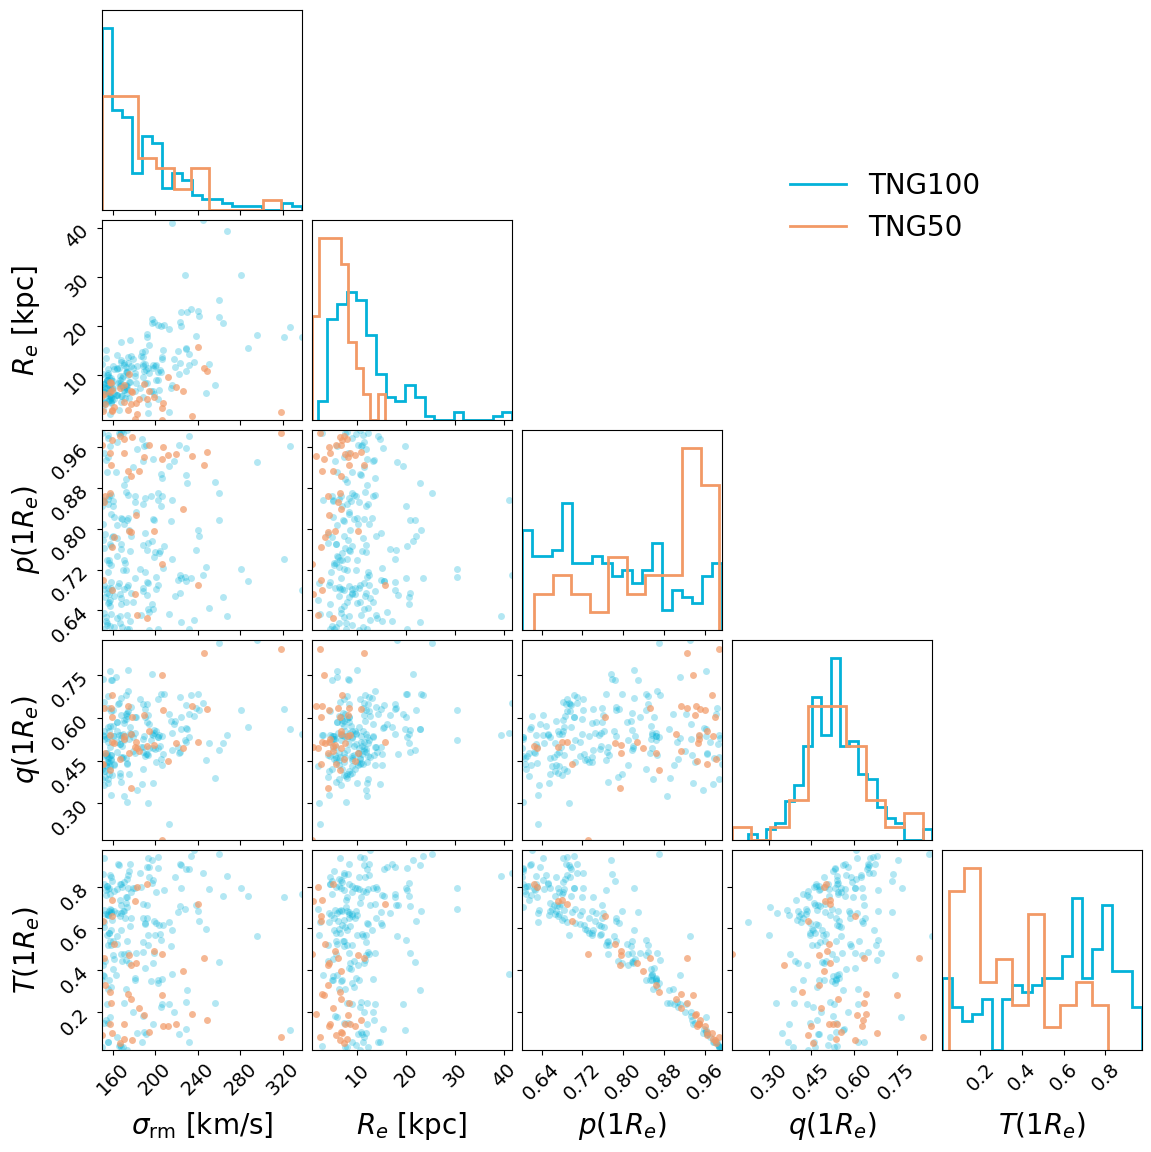

In [8]:
color_100 = clist[0]
color_50 = clist[2]

hist2dkwargs = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': color_100, 'data_kwargs': {'ms': 5, 'alpha': 0.3}}
fig = corner.corner(data_tng100, **hist2dkwargs,  labels=[r'$\sigma_{\mathrm{rm}}$ [km/s]', r'$R_e$ [kpc]', r'$p(1R_e)$' ,r'$q(1R_e)$', r'$T(1R_e)$'], label_kwargs={'fontsize': 20}, hist_kwargs={'linewidth': 2, 'density' : True})

hist2dkwargs_50 = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': color_50, 'data_kwargs': {'ms': 5, 'alpha': 0.7}}
corner.corner(data_tng50, fig=fig, bins = 10, **hist2dkwargs_50, hist_kwargs={'linewidth': 2, 'density' : True})

for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=14)

plt.plot([], [], color = color_100, lw = 2, marker = '', label = 'TNG100')
plt.plot([], [], color = color_50, lw = 2, marker = '', label = 'TNG50')

fig.legend(bbox_to_anchor=(0., 0.85, 0.85 ,0), fontsize=20, frameon=False)

plt.savefig('./tng_data_summary.pdf', bbox_inches='tight', dpi=300)

plt.show()